# Mathematical Pendulum

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Data

In [2]:
# length in cm
# length_cm =np.array([12.1, 20.9, 25.8, 35.3, 43.5, 48.6, 52.2, 64.1, 68.7, 89.3])+0.75 # By
length_cm =np.array([17.6, 17.6, 17.6, 20.5, 20.5, 20.5, 22.8, 22.8, 22.8, 32.79, 32.79, 32.79, 
                     40.5, 40.5, 40.5, 49.7, 49.7, 61.9, 61.9, 68.8, 68.8, 80.5, 80.5, 87, 87]) # Feli & Lou-Anna

# time for N periods in s
# time = np.array([14.35, 18.69, 20.74, 12.05, 13.29, 14.09, 14.7, 16.13, 16.65, 18.97]) # By
time = np.array([16.81, 16.77, 16.82, 18.18, 18.12, 18.06, 19.11, 18.97, 19.02, 23.02, 22.93, 23.00, 
                 25.57, 25.57, 25.52, 28.31, 28.30, 31.60, 31.55, 33.34, 33.37, 36.09, 35.99, 
                 37.45, 37.50]) # Feli & Lou-Anna
# periods
# N_periods = np.array([20, 20, 20, 10, 10, 10, 10, 10, 10, 10]) # By
N_periods = np.ones(len(time)) * 20

### Calculate values in basic units and per period

In [3]:
period = time/N_periods
length = length_cm / 100

### Define Plots

In [4]:
def plot_error(x_data, y_data, x_error, y_error, x_label='', y_label='', title='', label=''):
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(10,5), dpi=300)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.errorbar(x_data, y_data, yerr=y_error, xerr=x_error, fmt='.', ecolor='black', capsize=2, label=label)
    return plt

def plot_data(x_data, y_data, x_label='', y_label='', title='', label=''):
    return plot_error(x_data, y_data, x_error=0, y_error=0, x_label=x_label, y_label=y_label, title=title, label=label)

### Plot Data

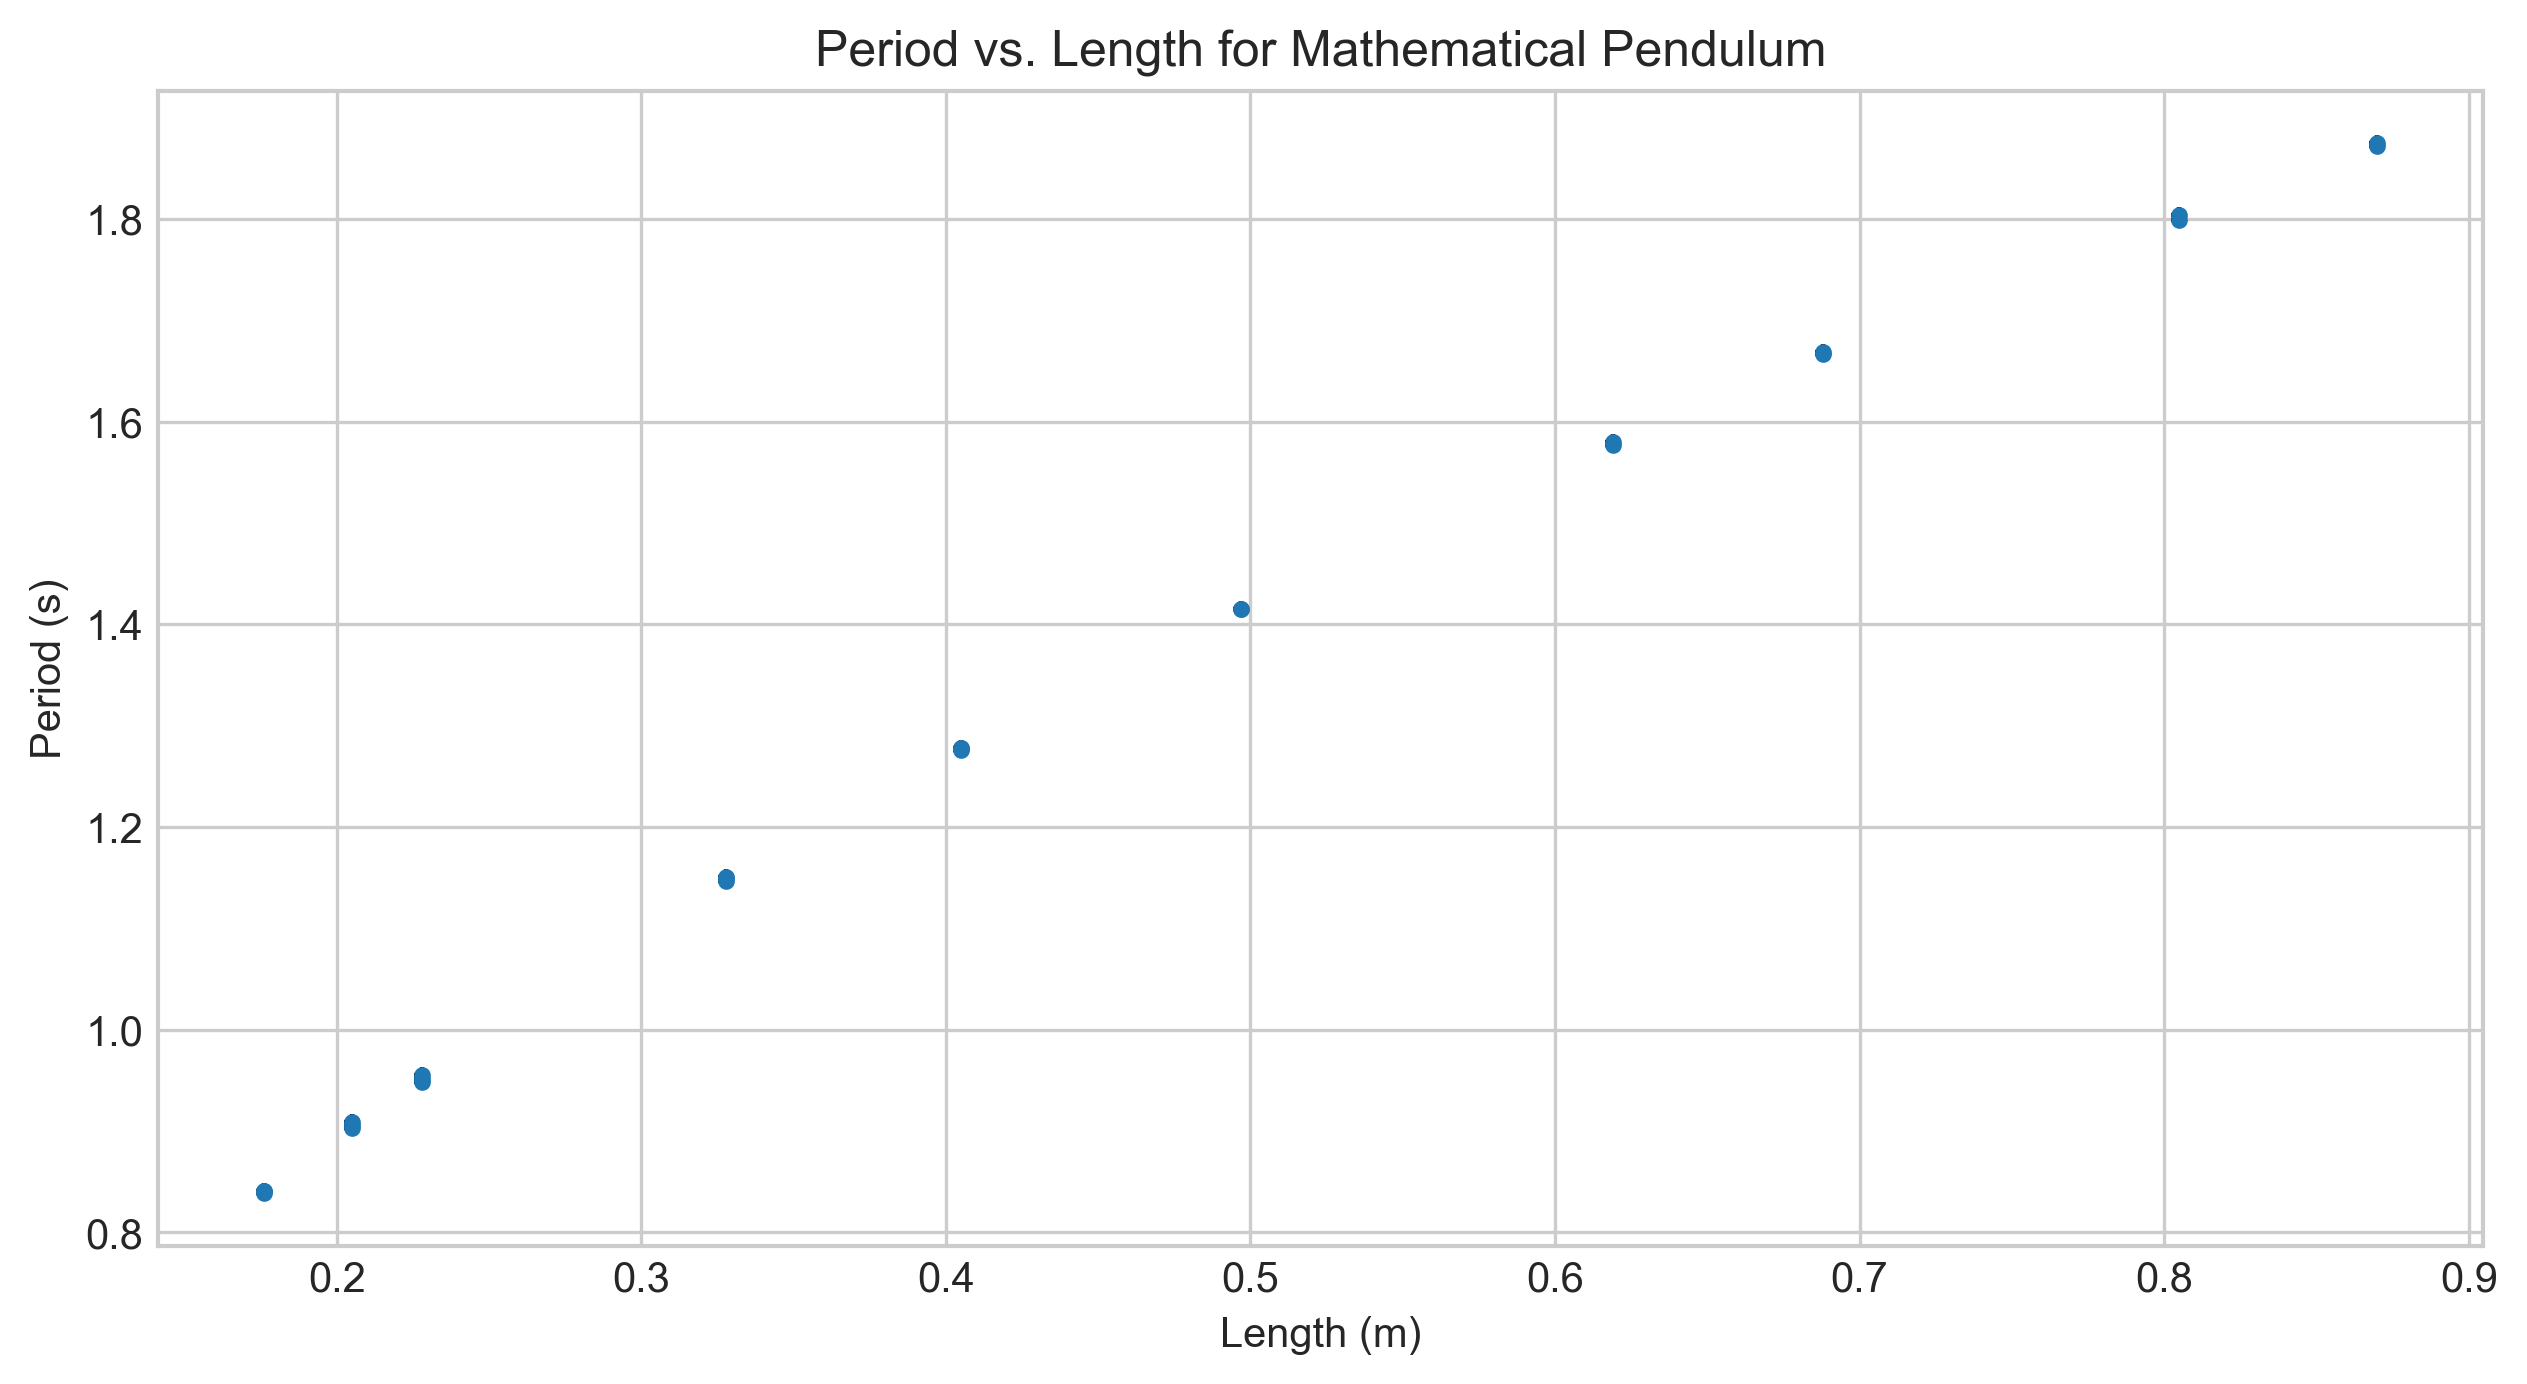

In [5]:
x_label = 'Length (m)'
y_label = 'Period (s)'
title = 'Period vs. Length for Mathematical Pendulum'

graph_TL = plot_data(length, period, x_label=x_label, y_label=y_label, title=title)
graph_TL.show()

### Errors

In [6]:
# time error per measurement in s
dt = 0.1
# length error in m
dl = 0.005
dT= dt/N_periods

### Plot graph with error bars

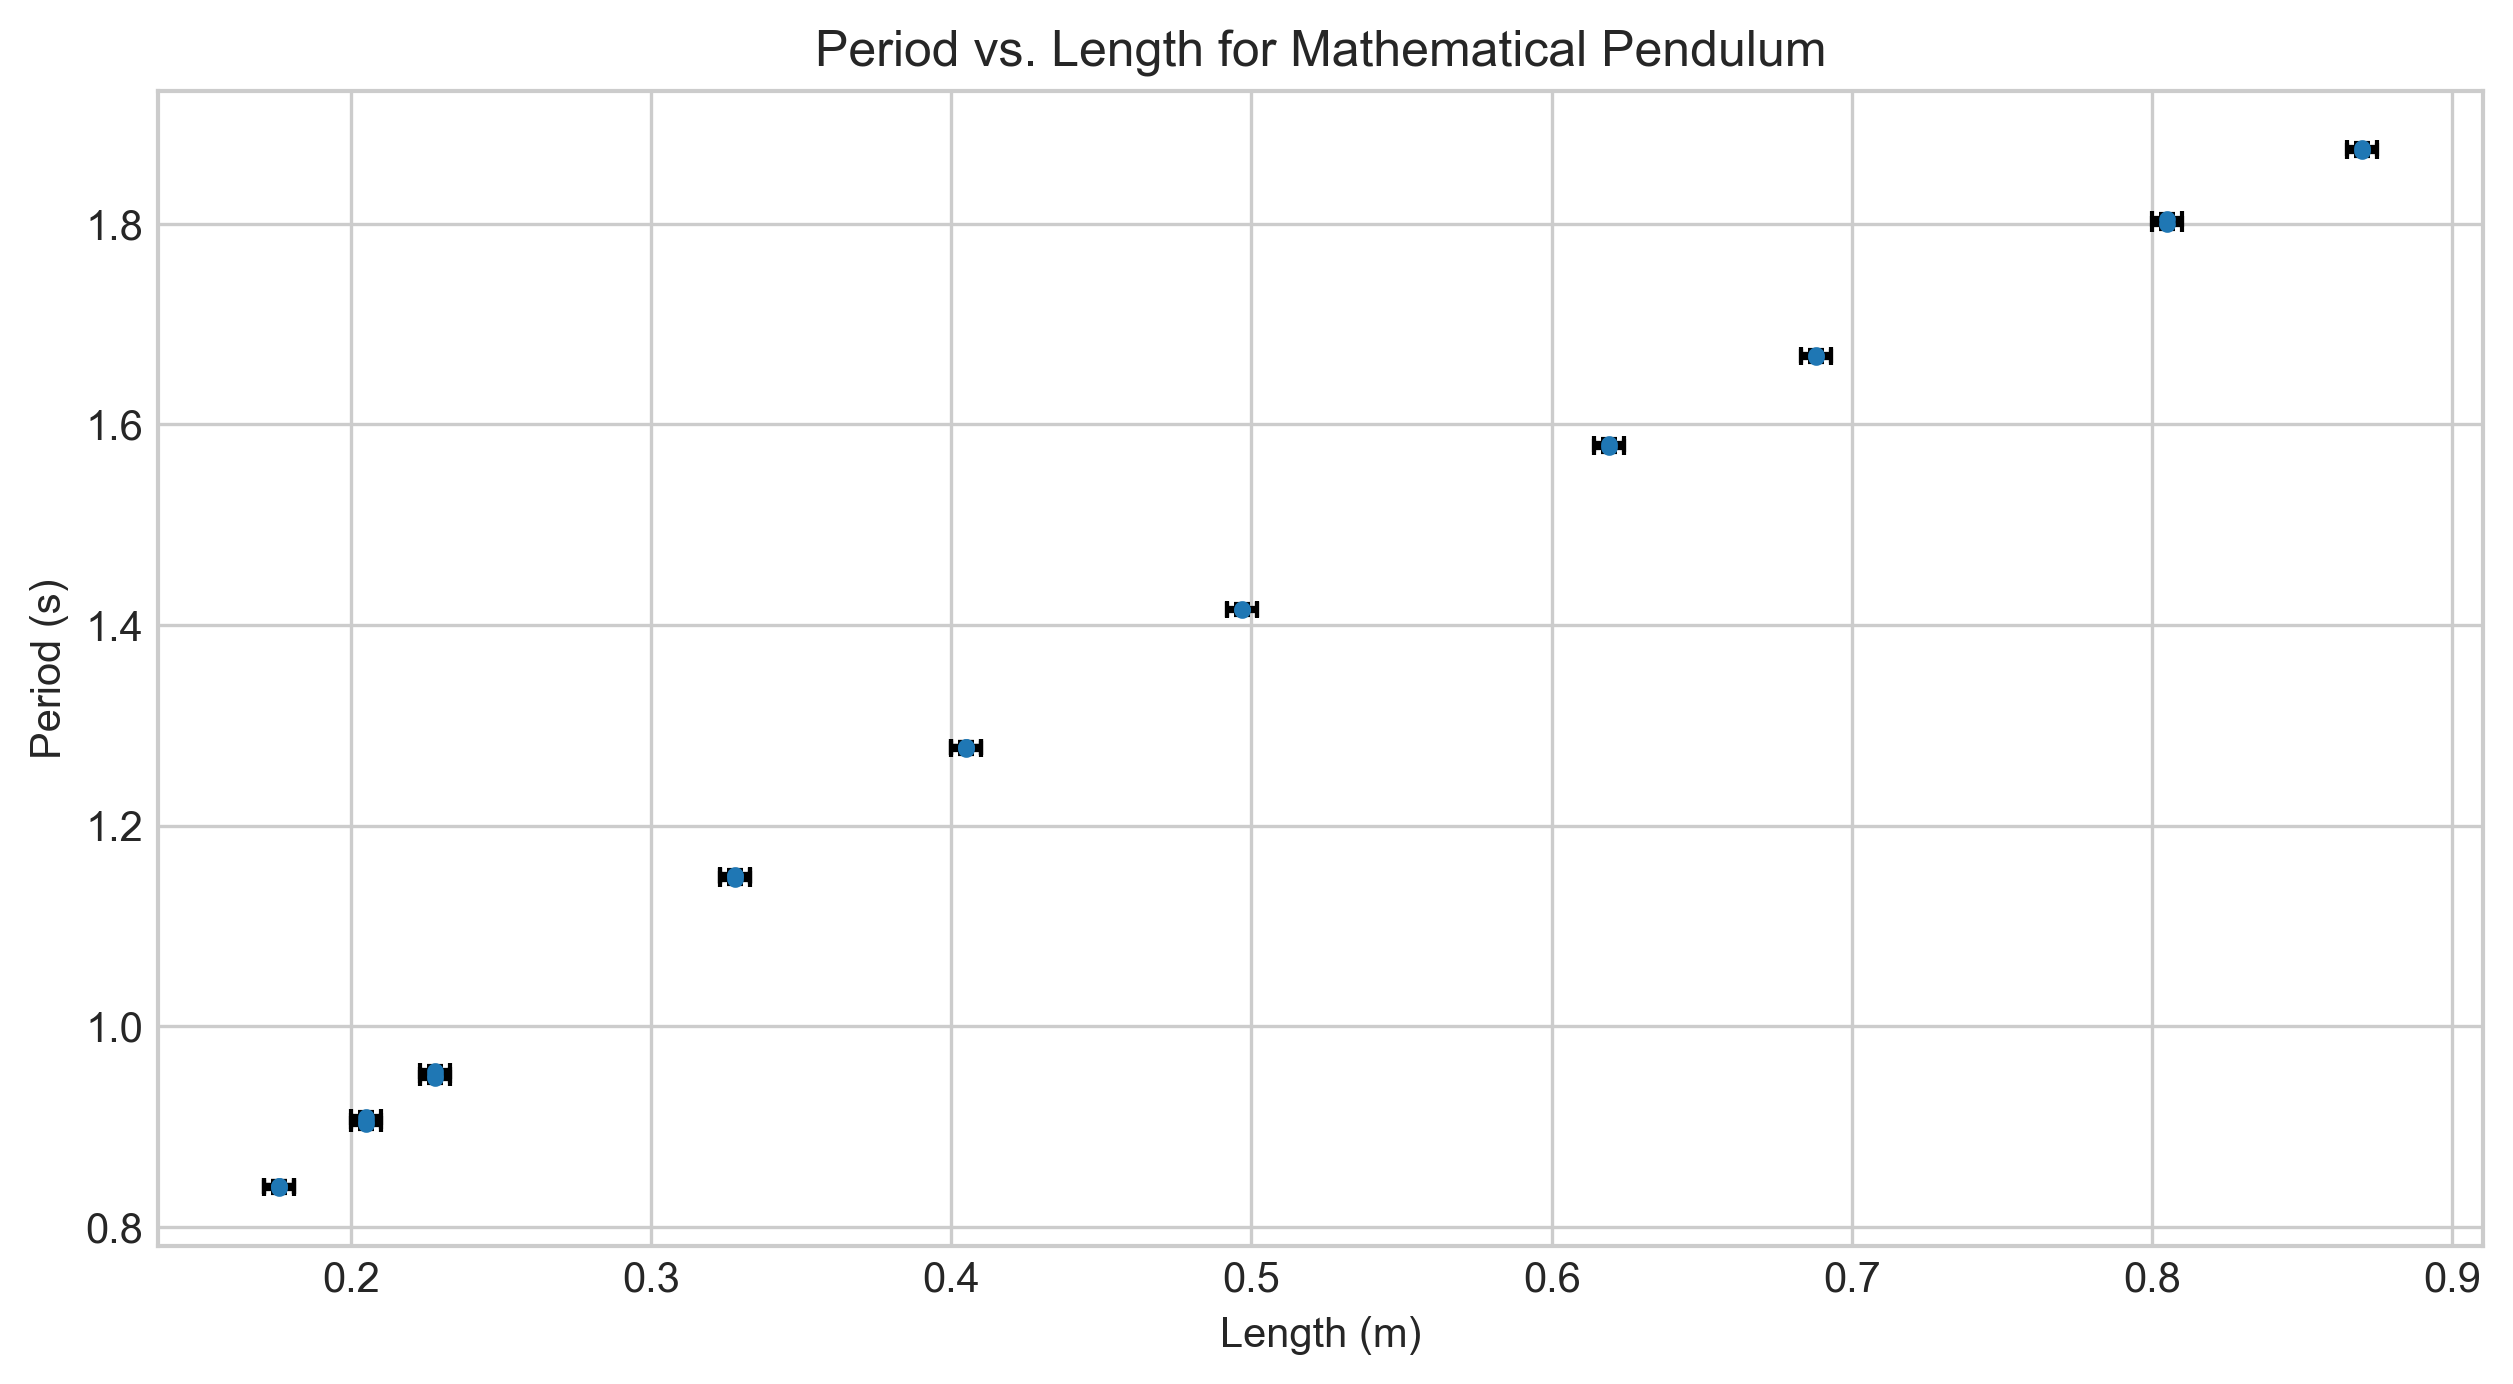

In [7]:
graph_TL = plot_error(length, period, dl, dT, x_label=x_label, y_label=y_label, title=title)
graph_TL.show()

### Define Fit Function

In [8]:
def f(x, a):
    return a * np.sqrt(x)

### Calculate Fit Parameters and Plot Best Fit

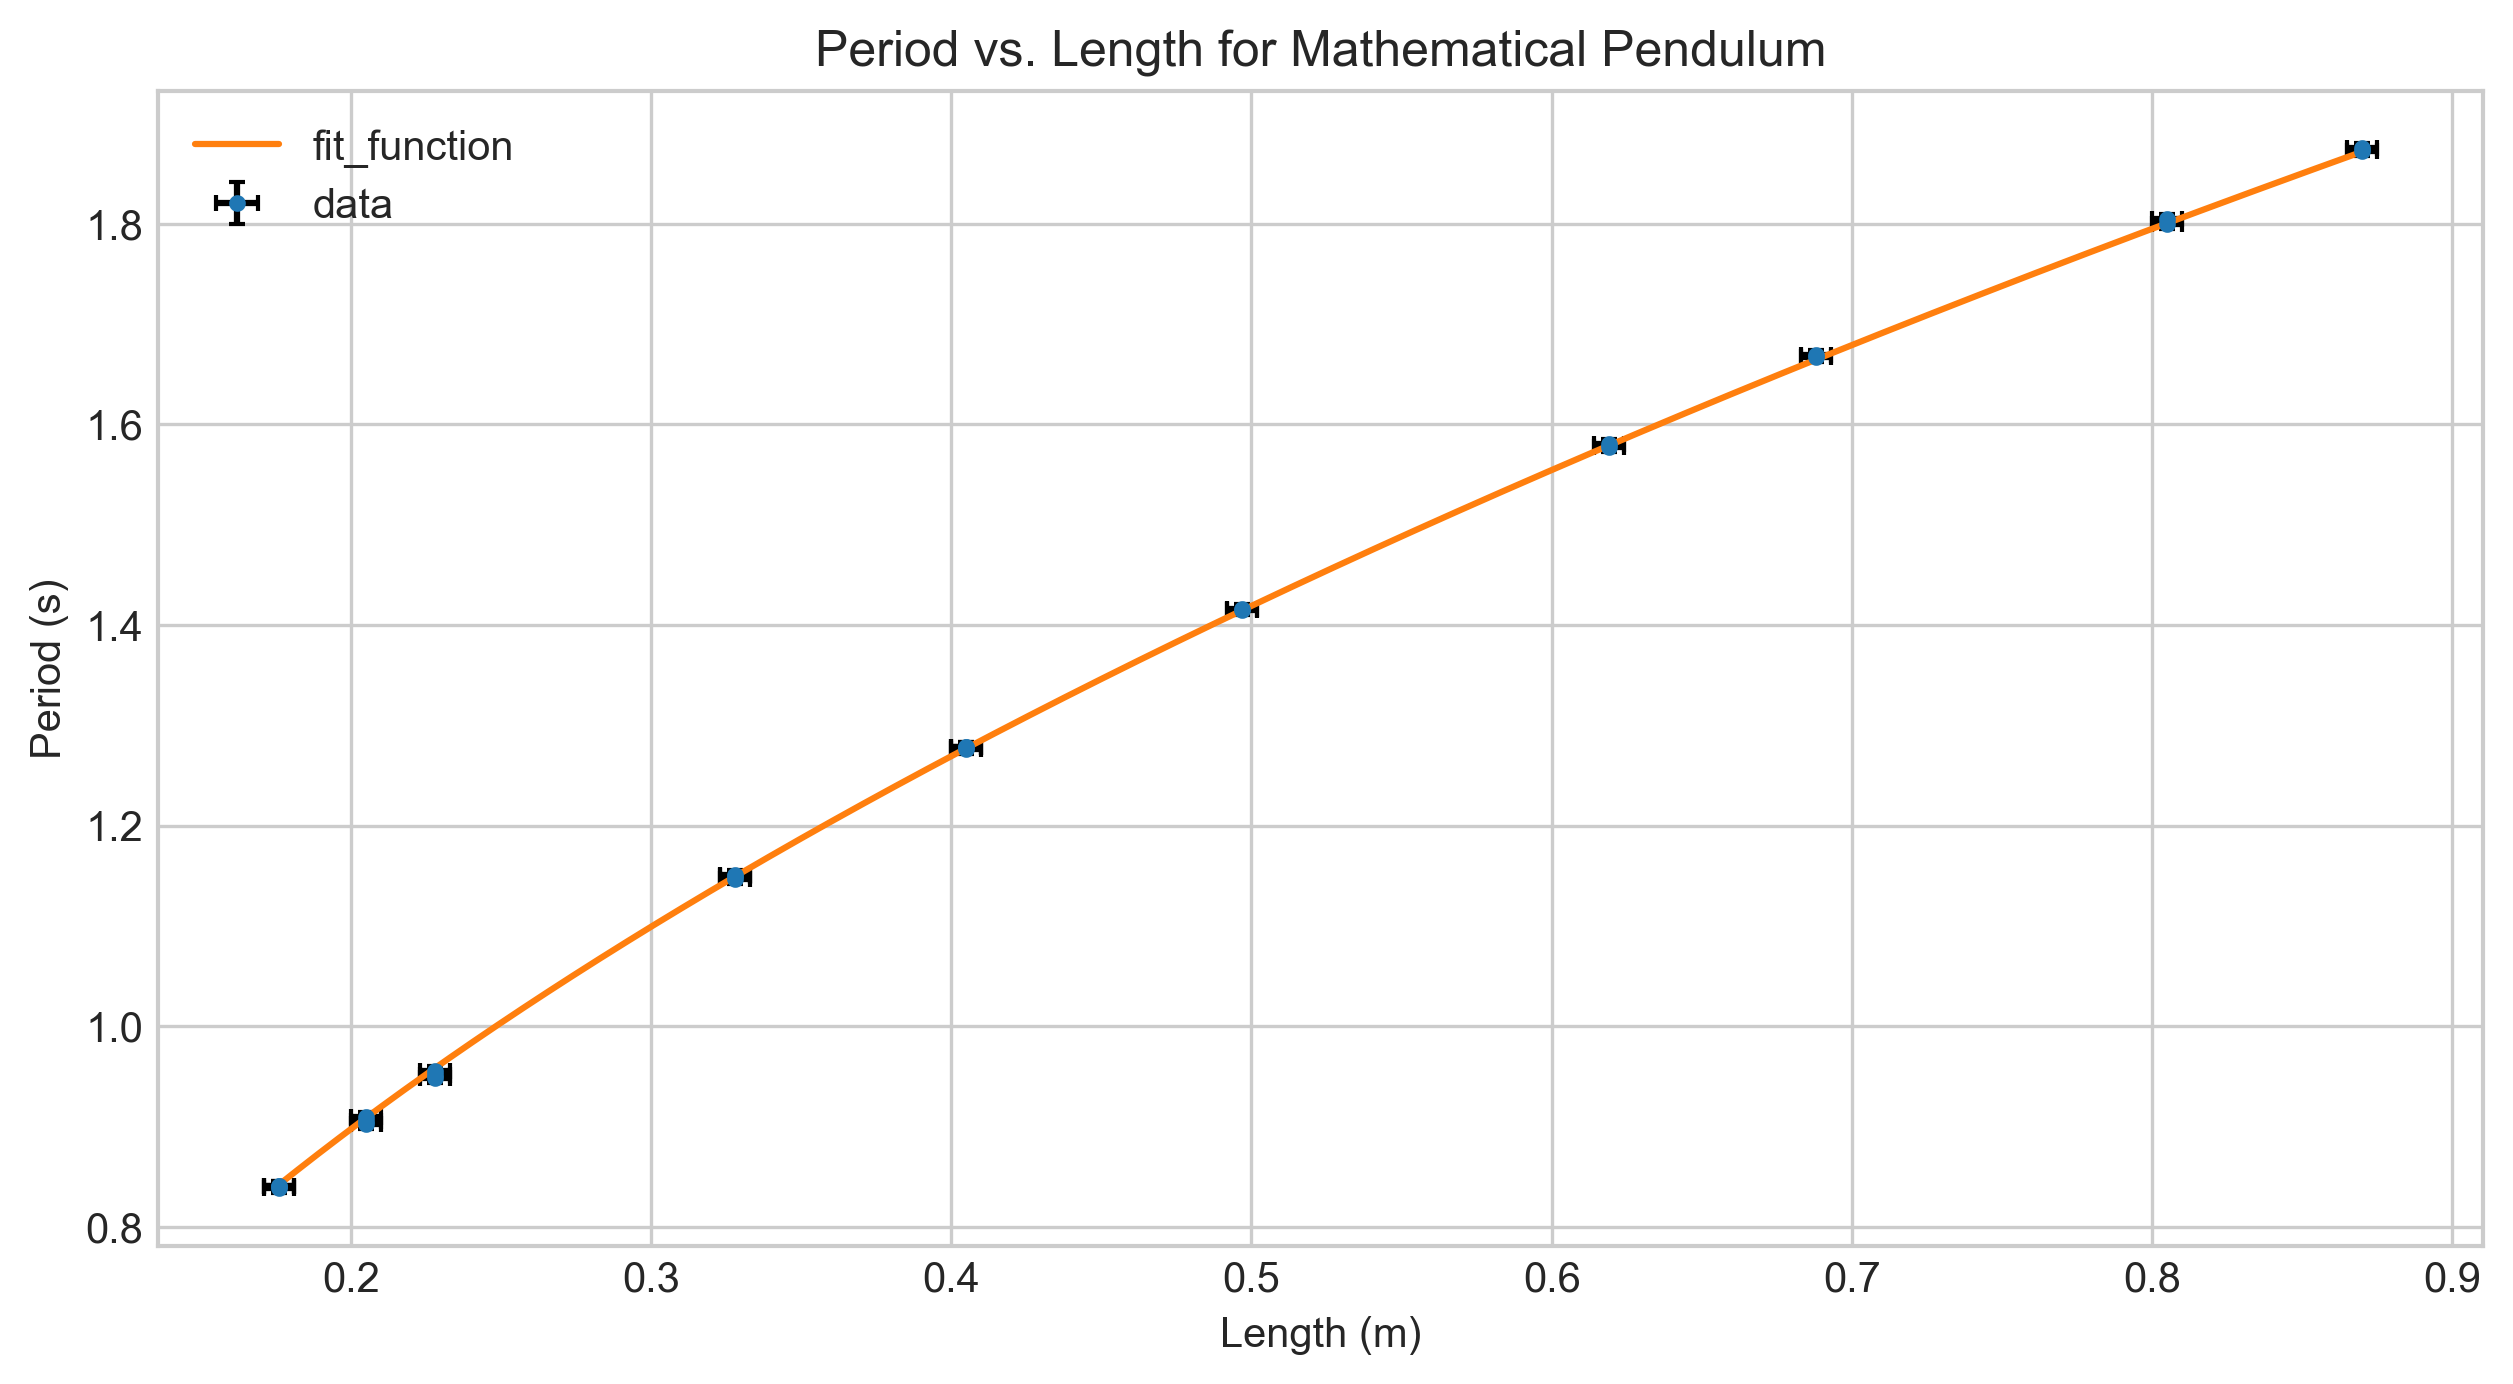

In [9]:
a_optimal, cov = curve_fit(f, length, period)

x = np.linspace(min(length), max(length), 1000)
y = f(x, a_optimal)

graph_TL = plot_error(length, period, dl, dT, x_label=x_label, y_label=y_label, title=title, label='data')
graph_TL.plot(x, y, label='fit_function')
graph_TL.legend()
graph_TL.show()


### Calculate Residuals and Show Residual Plot

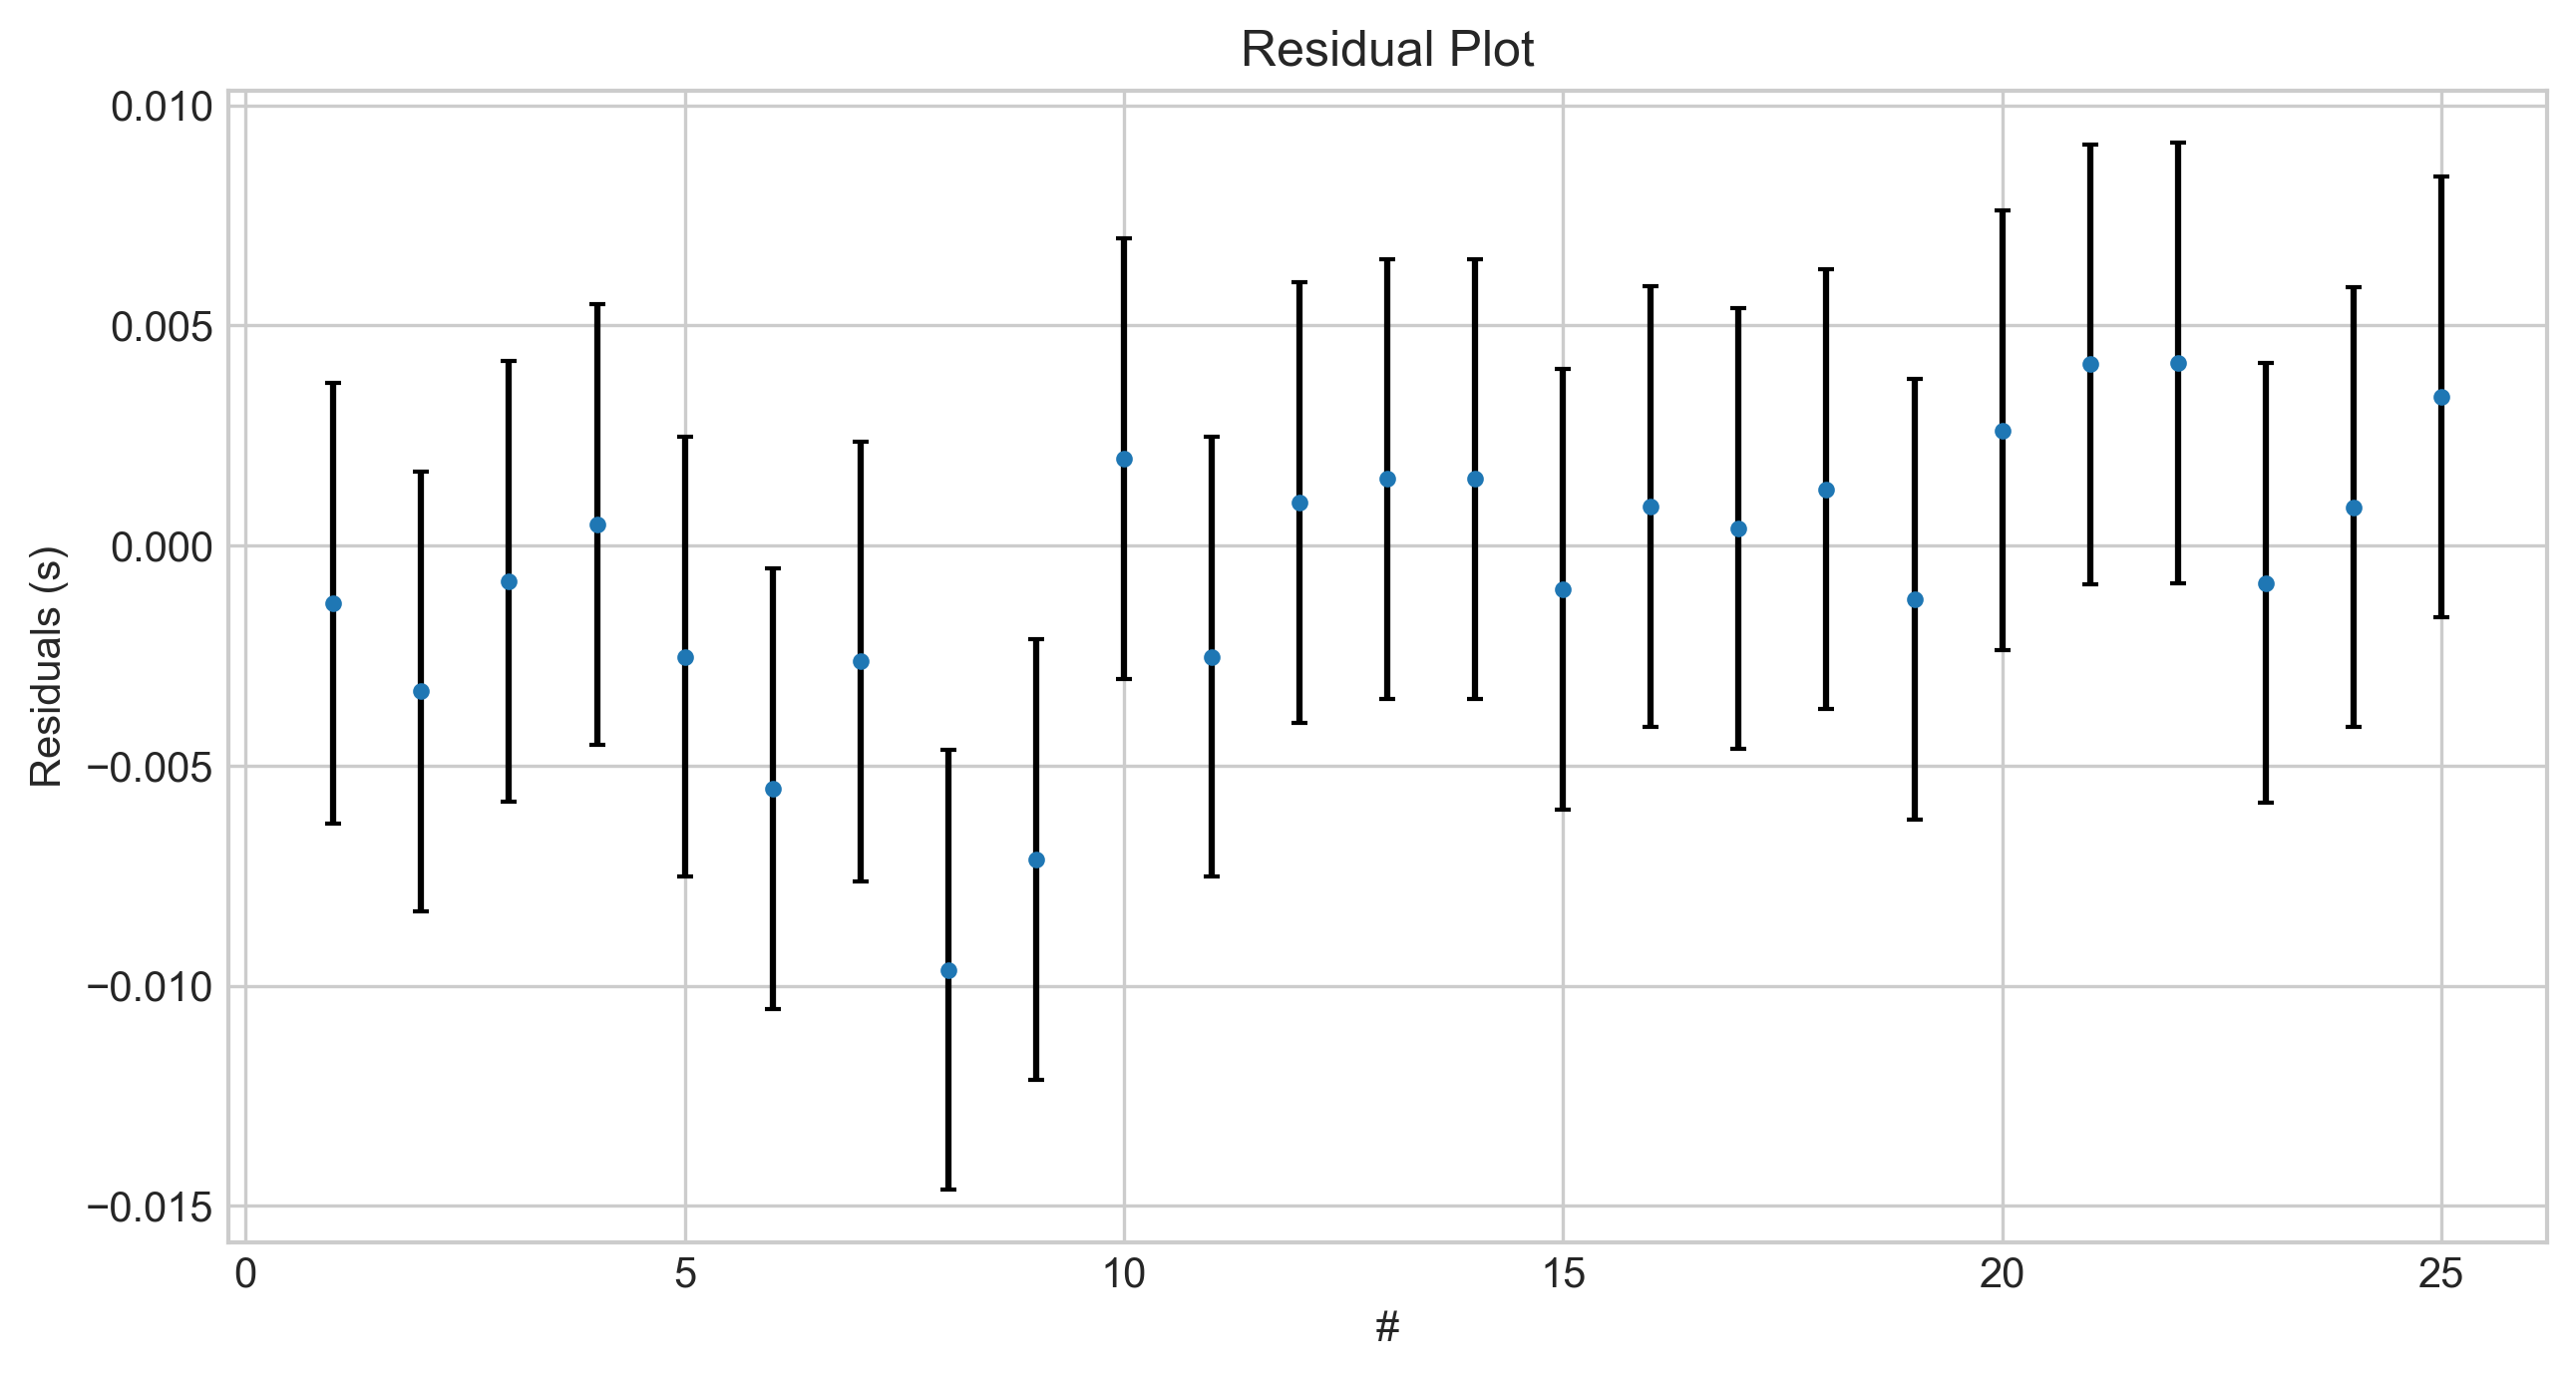

In [13]:
title = 'Residual Plot'
x_label = '#'
y_label = 'Residuals (s)'

res = period - f(length, a_optimal)

res_plot = plot_error(range(1, len(time)+1), res, 0, dT, x_label=x_label, y_label=y_label, title=title)
res_plot.show()


### Calculate Gravitational Acceleration

#### from data points

g = (9.82399 ± 0.23512) m/s2 = (9.82 ± 0.24) m/s2


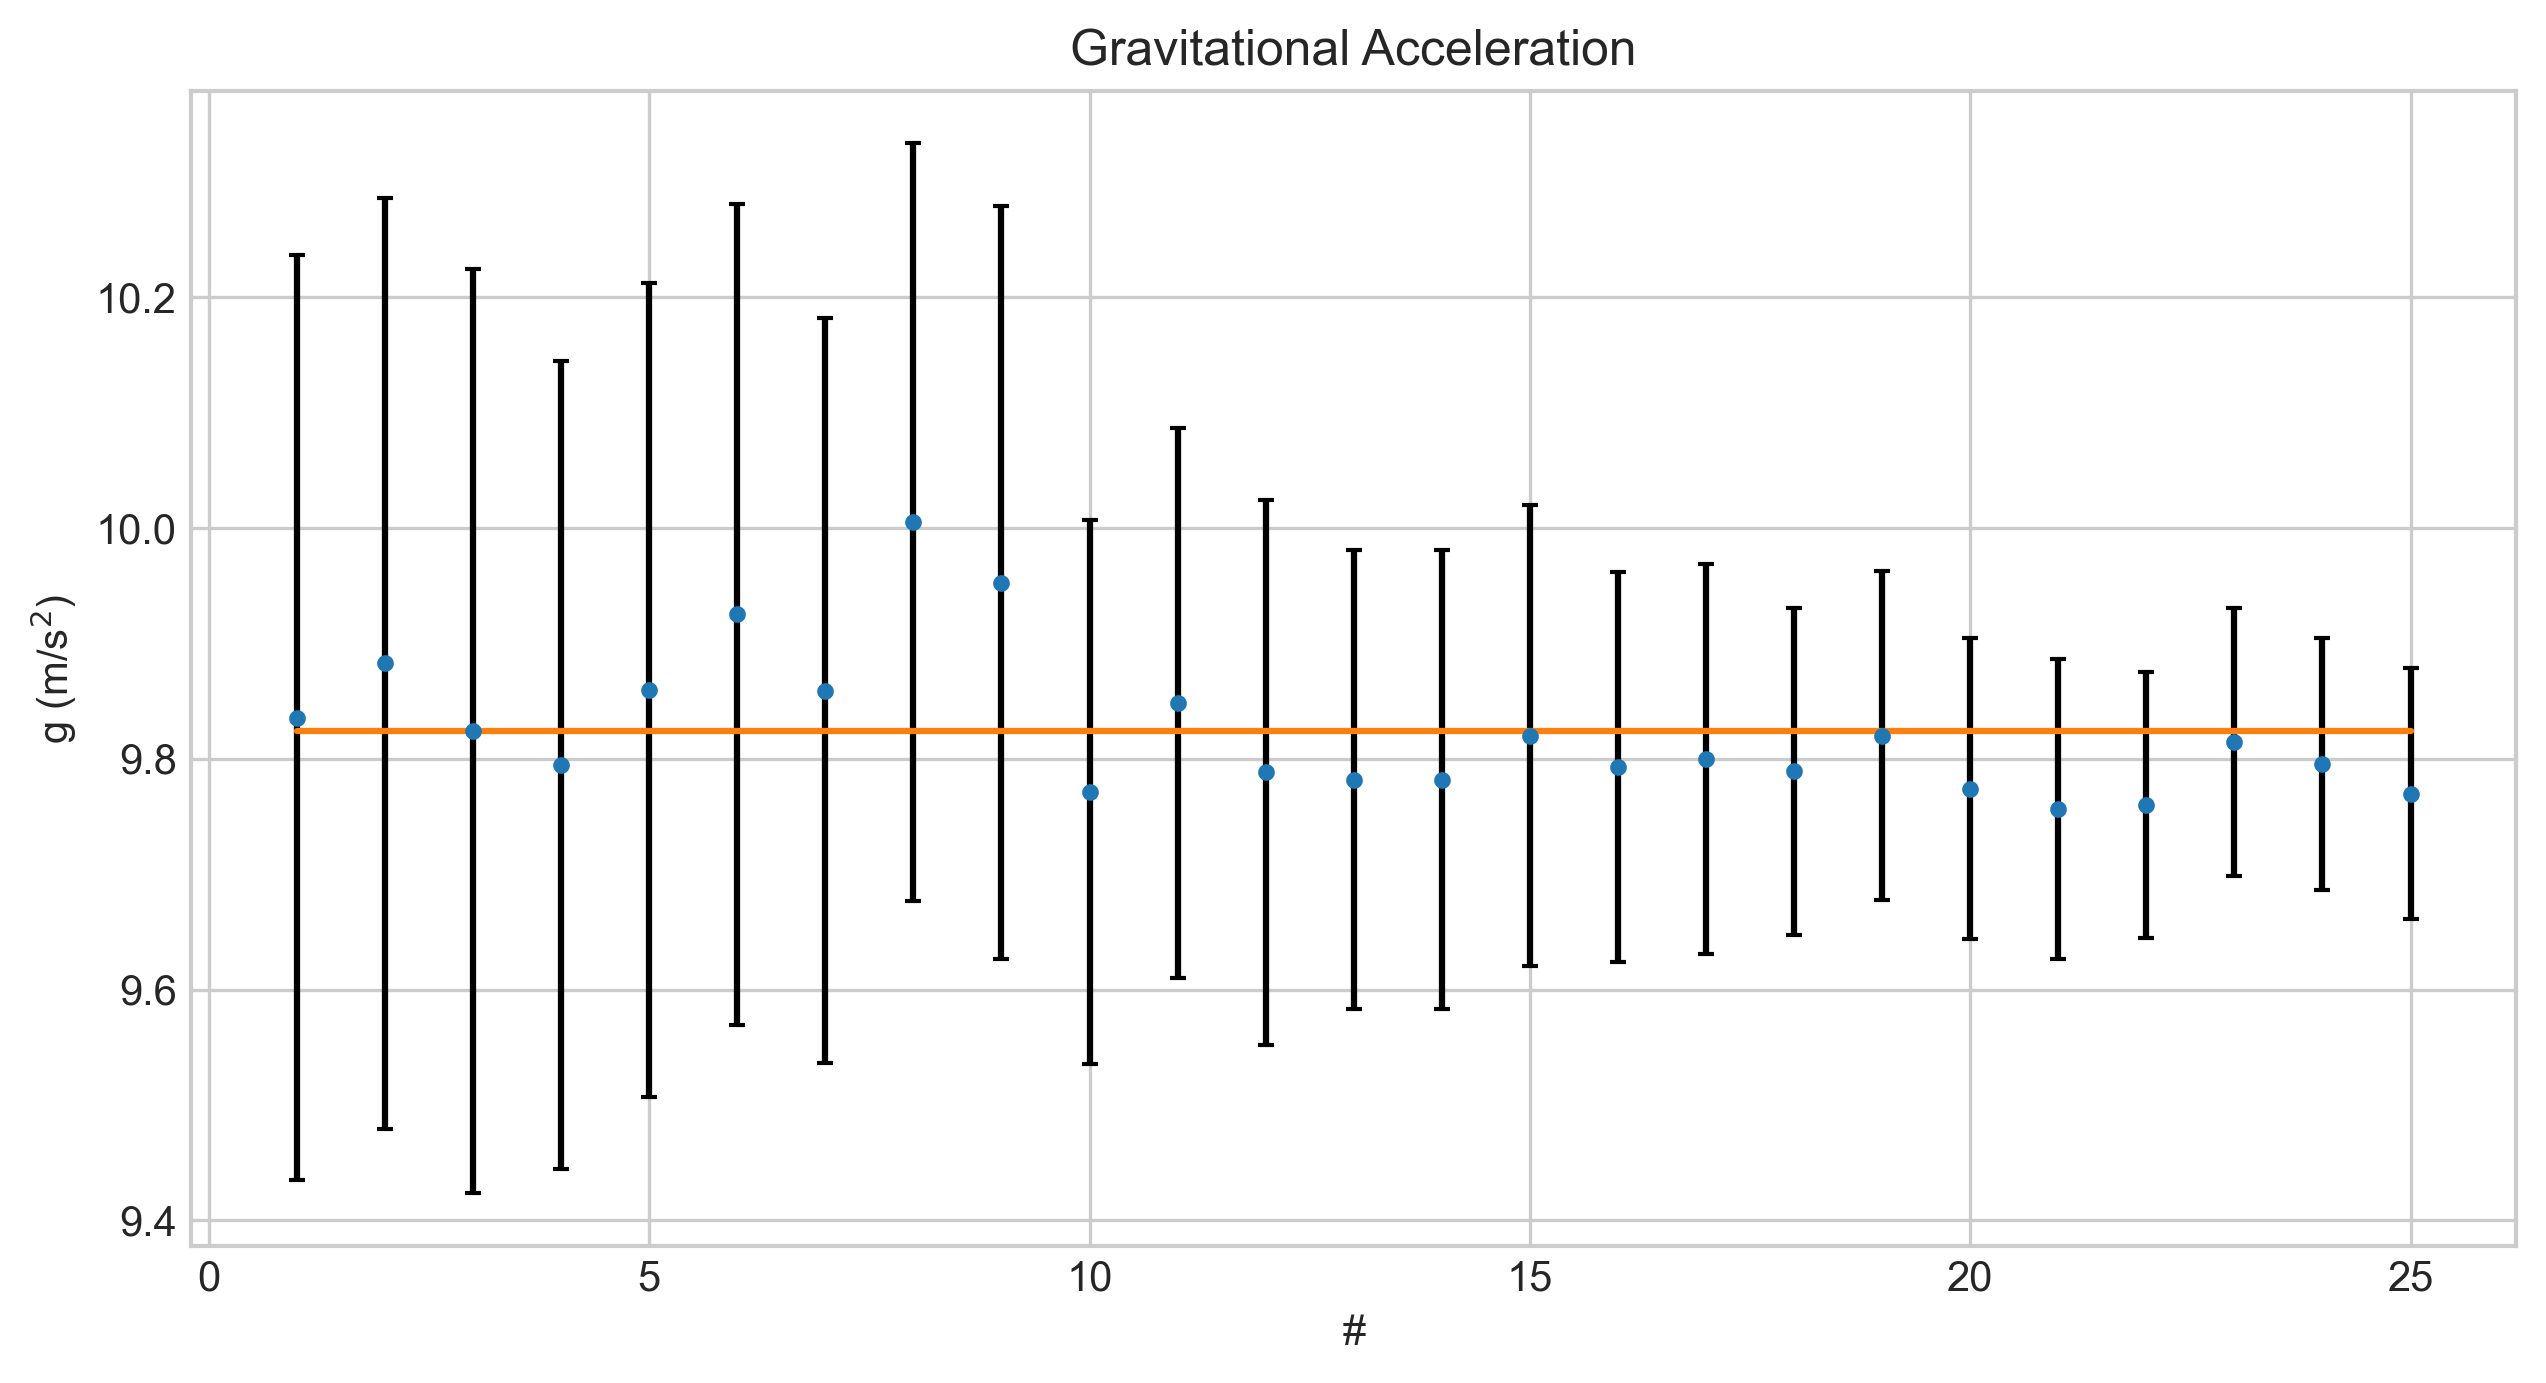

In [34]:
g = 4 * np.pi**2 * length / period**2
g_mean = g.mean()
N = len(g)

gmax = 4 * np.pi**2 * (length + dl) / (period - dT)**2
dg = (gmax - g)
dg_mean = dg.mean()


print(f'g = ({g_mean:.5f} ± {dg_mean:.5f}) m/s2 = ({g_mean:.2f} ± {dg_mean:.2f}) m/s2')

title = 'Gravitational Acceleration'
y_label = r'g (m/s$^2$)'
g_plot = plot_error(range(1, N+1), g, 0, dg, x_label=x_label, y_label=y_label, title=title)

plt.plot(range(1, N+1), [g_mean]*N)
plt.show()

#### from fit parameter

In [35]:
g_fit = (4 * np.pi**2 / a_optimal**2)[0]

# simulate error for g

N = 1000 # number of simulation runs

a_min = a_optimal

for i in range(N):
    period_rnd = period + np.random.rand(1) * dT
    length_rnd = length + np.random.rand(1) * dl

    a_rnd, cov_rnd = curve_fit(f, length_rnd, period_rnd)
    a_min = min(a_rnd, a_min)

g_max = (4 * np.pi**2 / a_min**2)[0]

dg = (g_max - g_fit)

print(f'g = ({g_fit:.5f} ± {dg:.5f}) m/s2 = ({g_fit:.2f} ± {dg:.2f}) m/s2')


g = (9.80484 ± 0.11056) m/s2 = (9.80 ± 0.11) m/s2
